
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("C:/Users/Valeriia Karpova/Desktop/Machine Learning/HW2/medical-charges.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Варіанти аналітичних досліджень:
    1) Пошукати закономірності залежностей charges від віку,статі, маси тіла. 
    2) Оцінити вплив наявності дітей 
    3) Оцінити вплив, чи палить людина. Очевидно, що ця характеристика завжди негативна, тобто її вплив на target змінну буде в бік збільшення. 

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [13]:
fig = px.histogram(df, x='charges', color='sex', facet_col='region', 
                   title='Distribution of Medical Charges by Sex and Region',
                   labels={'charges': 'Medical Charges', 'sex': 'Sex', 'region': 'Region'},
                   marginal='box')

fig.update_layout(bargap=0.1)
fig.show()

Висновки:
1) Медичні збори значно варіюються як за статтю, так і за регіонами. Найбільше значення зборів (до 60k) спостерігається у регіоні southeast.
2) Чоловіки мають тенденцію мати вищі медичні збори, ніж жінки у всіх регіонах.
3) Більшість зборів зосереджені в нижньому діапазоні (до 20k), є певна кількість високих зборів, що може вказувати на значні медичні витрати для певних категорій осіб.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [15]:
fig = px.histogram(df, x='region', color='smoker', 
                   title='Distribution of smokers by region',
                   labels={'smoker': 'Smoker', 'region': 'Region'},
                   marginal='box')

fig.update_layout(bargap=0.1)
fig.show()

Висновки:
1) У всіх регіонах кількість курців значно менша, ніж кількість некурців.
2) Найбільша загальна кількість курців і некурців спостерігається в регіоні southeast (даних з цього регіону найбільше), але розподіл у всіх регіонах є подібним.

In [17]:
fig = px.histogram(df, x='region', color='children', 
                   title='Distribution of clients with child by region',
                   labels={'children': 'Children', 'region': 'Region'},
                   marginal='box')

fig.update_layout(bargap=0.1)
fig.show()

Висновок:

1.У всіх регіонах кількість клієнтів без дітей є найвищою.

2.Більшість клієнтів мають 1 або 2 дітей, і лише невелика частка клієнтів має 3 або більше дітей.

3.Розподіл клієнтів за кількістю дітей є подібним у всіх регіонах, що може свідчити про схожість демографічної структури клієнтів у різних регіонах.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [19]:
fig = px.violin(df, x='children', y='charges', color='children', box=True, points='all', 
                title='Distribution of Medical Charges by Number of Children',
                labels={'children': 'Number of Children', 'charges': 'Medical Charges'})

fig.show()

Спостереження: медичні збори варіюються у всіх категоріях, і існують високі значення у всіх групах, включаючи тих, у кого немає дітей, бачимо викиди в усіх групах. Хоча медіана медичних зборів має тенденцію бути вищою для клієнтів з більшою кількістю дітей, немає чіткої і однозначної тенденції до збільшення медичних зборів зі збільшенням кількості дітей. 

In [25]:
#Побудуємо матрицю кореляції, щоб все ж трохи більше дослідити зв'язок між children та charges
corr = df.select_dtypes(include = 'number').corr()
corr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Бачимо, що кореляція між children та charges досить слабка, інші параметри (age, bmi) мають сильнішу кореляцію. 

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [21]:
non_smoker_df = df[df.smoker == 'no']

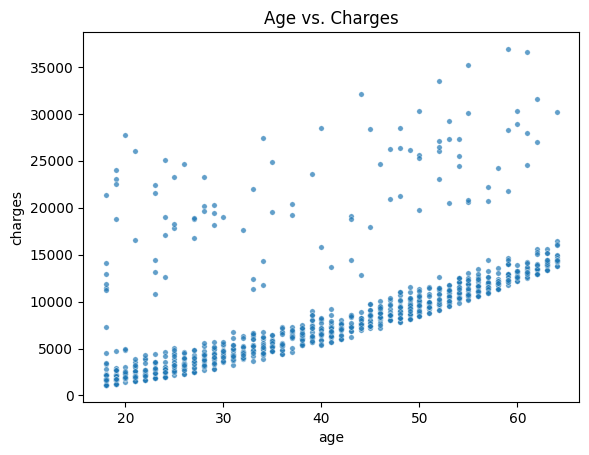

In [26]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [22]:
def estimate_charges(age, w, b):
    return w * age + b

In [23]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

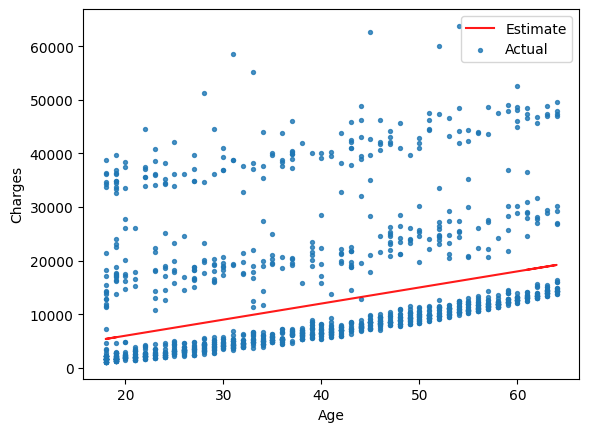

In [55]:
try_parameters(df,300,5) #вдалося підібрати кут нахилу

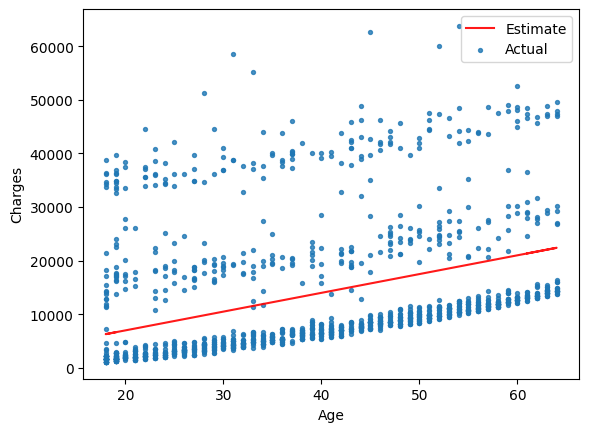

In [66]:
try_parameters(df,350,0)

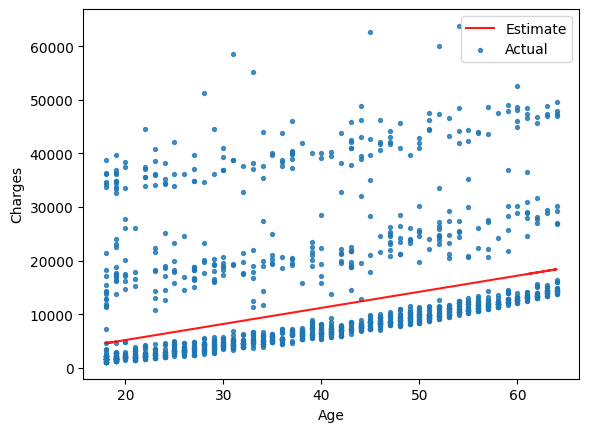

In [68]:
try_parameters(df,300,-800)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [61]:
w = 300
b = 5
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

5780.896248714801

In [71]:
w = 350
b = 0
rmse(targets, predicted)

7191.995767957093

In [73]:
w = 300
b = -800
rmse(targets, predicted)

7191.995767957093

Найнижче значення втрат при випадково підібраних параметрах становить 5780 при значеннях w = 300,
b = 5. 
Для покращення підбору параметрів необхідно підібрати стартові параметри, визначити крок змін та далі ітерувати змінні, слідкуючи за тенденціями (це якщо вручну). В ідеалі - використати готові підходи, як от градієнтний спуск. 